In [20]:
import tensorflow as tf
print(tf.__version__) #2.0에선 실행이 안된다 ㅠ

1.14.0


In [2]:
!pip3 show gym
!pip3 show pyglet
!pip3 show mpi4py

Name: gym
Version: 0.18.0
Summary: The OpenAI Gym: A toolkit for developing and comparing your reinforcement learning agents.
Home-page: https://github.com/openai/gym
Author: OpenAI
Author-email: gym@openai.com
License: UNKNOWN
Location: c:\windows\system32\gym
Requires: scipy, numpy, pyglet, Pillow, cloudpickle
Required-by: stable-baselines
Name: pyglet
Version: 1.5.0
Summary: Cross-platform windowing and multimedia library
Home-page: http://pyglet.readthedocs.org/en/latest/
Author: Alex Holkner
Author-email: Alex.Holkner@gmail.com
License: BSD
Location: c:\users\308_2\.conda\envs\minji\lib\site-packages
Requires: future
Required-by: gym
Name: mpi4py
Version: 3.0.3
Summary: Python bindings for MPI
Home-page: https://bitbucket.org/mpi4py/mpi4py/
Author: Lisandro Dalcin
Author-email: dalcinl@gmail.com
License: BSD
Location: c:\users\308_2\.conda\envs\minji\lib\site-packages
Requires: 
Required-by: 


In [21]:
# 애니메이션을 만드는 함수 https://exmemory.tistory.com/28
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import display

def display_frames_as_mp4(frames):
    
    plt.figure(figsize=(frames[0].shape[1]/72.0, frames[0].shape[0]/72.0), dpi=72)
    patch = plt.imshow(frames[0])
    plt.axis('off')
    
    def animate(i):
        patch.set_data(frames[i])
        
    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval=18) # 속도 조절,, 작으면 빨라짐
    anim.save('./movie_carpole.mp4') # 애니메이션을 저장하는 부분

In [22]:
import gym

from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO2

frames=[] #gif 만들기 위함

# Create the environment
env = gym.make('CartPole-v1')
#env.reset()

#ppo2는 vectorized된 환경 필요
env = DummyVecEnv([lambda: env])  # The algorithms require a vectorized environment to run

# Define the model
model = PPO2(MlpPolicy, env, verbose=1)

# 훈련 얼마나 시킬건지?? -> 보통 오래할수록 잘됨
model.learn(total_timesteps=30000)

# 움직임 확인하기
obs = env.reset()
for i in range(10000):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    frames.append(env.render(mode = 'rgb_array'))
    env.render() #창띄우기
env.close()


---------------------------------------
| approxkl           | 1.9965099e-05  |
| clipfrac           | 0.0            |
| explained_variance | -0.00108       |
| fps                | 511            |
| n_updates          | 1              |
| policy_entropy     | 0.6931263      |
| policy_loss        | -0.00029302656 |
| serial_timesteps   | 128            |
| time_elapsed       | 0              |
| total_timesteps    | 128            |
| value_loss         | 46.690983      |
---------------------------------------
--------------------------------------
| approxkl           | 6.649661e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0.0266        |
| fps                | 2070          |
| n_updates          | 2             |
| policy_entropy     | 0.6930886     |
| policy_loss        | -0.0017914325 |
| serial_timesteps   | 256           |
| time_elapsed       | 0.251         |
| total_timesteps    | 256           |
| value_loss         | 29.907259     |
------------

--------------------------------------
| approxkl           | 6.3761845e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0.0269        |
| fps                | 2103          |
| n_updates          | 14            |
| policy_entropy     | 0.6773895     |
| policy_loss        | -0.0006664465 |
| serial_timesteps   | 1792          |
| time_elapsed       | 1.04          |
| total_timesteps    | 1792          |
| value_loss         | 46.850792     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0010820776 |
| clipfrac           | 0.00390625   |
| explained_variance | 0.0394       |
| fps                | 2037         |
| n_updates          | 15           |
| policy_entropy     | 0.6668316    |
| policy_loss        | -0.011392132 |
| serial_timesteps   | 1920         |
| time_elapsed       | 1.1          |
| total_timesteps    | 1920         |
| value_loss         | 46.89809     |
-------------------------------------

-------------------------------------
| approxkl           | 3.4573e-05   |
| clipfrac           | 0.0          |
| explained_variance | 0.0375       |
| fps                | 2212         |
| n_updates          | 31           |
| policy_entropy     | 0.6292832    |
| policy_loss        | -0.001126046 |
| serial_timesteps   | 3968         |
| time_elapsed       | 2.14         |
| total_timesteps    | 3968         |
| value_loss         | 38.471436    |
-------------------------------------
---------------------------------------
| approxkl           | 9.089932e-06   |
| clipfrac           | 0.0            |
| explained_variance | 0.018          |
| fps                | 1974           |
| n_updates          | 32             |
| policy_entropy     | 0.62853116     |
| policy_loss        | -0.00022948836 |
| serial_timesteps   | 4096           |
| time_elapsed       | 2.2            |
| total_timesteps    | 4096           |
| value_loss         | 55.68519       |
--------------------------

--------------------------------------
| approxkl           | 1.2308701e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.127         |
| fps                | 2103          |
| n_updates          | 48            |
| policy_entropy     | 0.5903899     |
| policy_loss        | -0.0009797901 |
| serial_timesteps   | 6144          |
| time_elapsed       | 3.22          |
| total_timesteps    | 6144          |
| value_loss         | 78.43708      |
--------------------------------------
--------------------------------------
| approxkl           | 2.6637515e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.0422       |
| fps                | 2139          |
| n_updates          | 49            |
| policy_entropy     | 0.5979933     |
| policy_loss        | 0.00016824703 |
| serial_timesteps   | 6272          |
| time_elapsed       | 3.28          |
| total_timesteps    | 6272          |
| value_loss         | 84.40213      |
-------------------------

--------------------------------------
| approxkl           | 2.022955e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0.179         |
| fps                | 2103          |
| n_updates          | 65            |
| policy_entropy     | 0.587128      |
| policy_loss        | 4.9550785e-05 |
| serial_timesteps   | 8320          |
| time_elapsed       | 4.27          |
| total_timesteps    | 8320          |
| value_loss         | 35.431217     |
--------------------------------------
--------------------------------------
| approxkl           | 3.2565018e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.336         |
| fps                | 2251          |
| n_updates          | 66            |
| policy_entropy     | 0.58134043    |
| policy_loss        | 0.0002695655  |
| serial_timesteps   | 8448          |
| time_elapsed       | 4.34          |
| total_timesteps    | 8448          |
| value_loss         | 71.88408      |
-------------------------

--------------------------------------
| approxkl           | 1.6781383e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.296         |
| fps                | 2005          |
| n_updates          | 82            |
| policy_entropy     | 0.6205867     |
| policy_loss        | 0.00016839232 |
| serial_timesteps   | 10496         |
| time_elapsed       | 5.33          |
| total_timesteps    | 10496         |
| value_loss         | 66.34139      |
--------------------------------------
--------------------------------------
| approxkl           | 9.6701315e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0.0138        |
| fps                | 2005          |
| n_updates          | 83            |
| policy_entropy     | 0.5966691     |
| policy_loss        | -0.0007725472 |
| serial_timesteps   | 10624         |
| time_elapsed       | 5.39          |
| total_timesteps    | 10624         |
| value_loss         | 55.574516     |
-------------------------

--------------------------------------
| approxkl           | 0.00020185363 |
| clipfrac           | 0.0           |
| explained_variance | 0.544         |
| fps                | 2070          |
| n_updates          | 99            |
| policy_entropy     | 0.56007874    |
| policy_loss        | -0.002033814  |
| serial_timesteps   | 12672         |
| time_elapsed       | 6.41          |
| total_timesteps    | 12672         |
| value_loss         | 49.33382      |
--------------------------------------
--------------------------------------
| approxkl           | 6.59903e-06   |
| clipfrac           | 0.0           |
| explained_variance | 0.551         |
| fps                | 2139          |
| n_updates          | 100           |
| policy_entropy     | 0.5894177     |
| policy_loss        | 0.00015621702 |
| serial_timesteps   | 12800         |
| time_elapsed       | 6.47          |
| total_timesteps    | 12800         |
| value_loss         | 44.484177     |
-------------------------

--------------------------------------
| approxkl           | 0.00053954055 |
| clipfrac           | 0.0           |
| explained_variance | -0.116        |
| fps                | 1974          |
| n_updates          | 116           |
| policy_entropy     | 0.5580396     |
| policy_loss        | 0.0038332085  |
| serial_timesteps   | 14848         |
| time_elapsed       | 7.47          |
| total_timesteps    | 14848         |
| value_loss         | 55.416843     |
--------------------------------------
--------------------------------------
| approxkl           | 1.8026758e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.215         |
| fps                | 2103          |
| n_updates          | 117           |
| policy_entropy     | 0.58304584    |
| policy_loss        | 0.00057693885 |
| serial_timesteps   | 14976         |
| time_elapsed       | 7.53          |
| total_timesteps    | 14976         |
| value_loss         | 44.36297      |
-------------------------

--------------------------------------
| approxkl           | 0.00024957044 |
| clipfrac           | 0.0           |
| explained_variance | 0.647         |
| fps                | 2251          |
| n_updates          | 133           |
| policy_entropy     | 0.5914395     |
| policy_loss        | -0.0026728907 |
| serial_timesteps   | 17024         |
| time_elapsed       | 8.55          |
| total_timesteps    | 17024         |
| value_loss         | 37.81915      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00035825875 |
| clipfrac           | 0.00390625    |
| explained_variance | 0.131         |
| fps                | 2138          |
| n_updates          | 134           |
| policy_entropy     | 0.5441156     |
| policy_loss        | -0.002433147  |
| serial_timesteps   | 17152         |
| time_elapsed       | 8.6           |
| total_timesteps    | 17152         |
| value_loss         | 59.625954     |
-------------------------

--------------------------------------
| approxkl           | 0.00015530045 |
| clipfrac           | 0.0           |
| explained_variance | 0.782         |
| fps                | 2037          |
| n_updates          | 150           |
| policy_entropy     | 0.5646973     |
| policy_loss        | -0.0025218914 |
| serial_timesteps   | 19200         |
| time_elapsed       | 9.6           |
| total_timesteps    | 19200         |
| value_loss         | 26.47364      |
--------------------------------------
-------------------------------------
| approxkl           | 3.116643e-05 |
| clipfrac           | 0.0          |
| explained_variance | 0.346        |
| fps                | 2037         |
| n_updates          | 151          |
| policy_entropy     | 0.5661306    |
| policy_loss        | 0.0009909169 |
| serial_timesteps   | 19328        |
| time_elapsed       | 9.66         |
| total_timesteps    | 19328        |
| value_loss         | 46.63311     |
-------------------------------------

--------------------------------------
| approxkl           | 1.9096942e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.804         |
| fps                | 2005          |
| n_updates          | 167           |
| policy_entropy     | 0.557189      |
| policy_loss        | 6.184133e-05  |
| serial_timesteps   | 21376         |
| time_elapsed       | 10.7          |
| total_timesteps    | 21376         |
| value_loss         | 21.636145     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00010022562 |
| clipfrac           | 0.0           |
| explained_variance | 0.861         |
| fps                | 2037          |
| n_updates          | 168           |
| policy_entropy     | 0.55449414    |
| policy_loss        | -0.0009992102 |
| serial_timesteps   | 21504         |
| time_elapsed       | 10.7          |
| total_timesteps    | 21504         |
| value_loss         | 18.226109     |
-------------------------

--------------------------------------
| approxkl           | 1.2308398e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.0347        |
| fps                | 2212          |
| n_updates          | 184           |
| policy_entropy     | 0.56155       |
| policy_loss        | -0.0006539185 |
| serial_timesteps   | 23552         |
| time_elapsed       | 11.7          |
| total_timesteps    | 23552         |
| value_loss         | 30.528831     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00039165604 |
| clipfrac           | 0.0           |
| explained_variance | 0.15          |
| fps                | 2005          |
| n_updates          | 185           |
| policy_entropy     | 0.5855226     |
| policy_loss        | 0.0013254032  |
| serial_timesteps   | 23680         |
| time_elapsed       | 11.8          |
| total_timesteps    | 23680         |
| value_loss         | 63.357124     |
-------------------------

---------------------------------------
| approxkl           | 0.0001062881   |
| clipfrac           | 0.0            |
| explained_variance | -0.0605        |
| fps                | 2103           |
| n_updates          | 201            |
| policy_entropy     | 0.57026714     |
| policy_loss        | -0.00011671218 |
| serial_timesteps   | 25728          |
| time_elapsed       | 12.8           |
| total_timesteps    | 25728          |
| value_loss         | 27.789062      |
---------------------------------------
---------------------------------------
| approxkl           | 1.3787387e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.0647         |
| fps                | 1974           |
| n_updates          | 202            |
| policy_entropy     | 0.53013957     |
| policy_loss        | -0.00024749443 |
| serial_timesteps   | 25856          |
| time_elapsed       | 12.9           |
| total_timesteps    | 25856          |
| value_loss         | 73.587975      |


--------------------------------------
| approxkl           | 0.00044711807 |
| clipfrac           | 0.0           |
| explained_variance | 0.0765        |
| fps                | 1974          |
| n_updates          | 218           |
| policy_entropy     | 0.5207988     |
| policy_loss        | -0.008488355  |
| serial_timesteps   | 27904         |
| time_elapsed       | 13.9          |
| total_timesteps    | 27904         |
| value_loss         | 89.83925      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00017444688 |
| clipfrac           | 0.0           |
| explained_variance | 0.338         |
| fps                | 2103          |
| n_updates          | 219           |
| policy_entropy     | 0.5487346     |
| policy_loss        | -0.0027395585 |
| serial_timesteps   | 28032         |
| time_elapsed       | 14            |
| total_timesteps    | 28032         |
| value_loss         | 22.708912     |
-------------------------

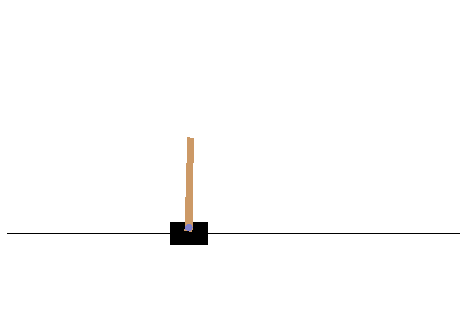

In [23]:
display_frames_as_mp4(frames)